In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm #statsmodels is based on scipi 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("2.01.+Admittance.csv")

In [3]:
raw_data.head(3)

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1, "No":0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
y = data['Admitted']
x1 = data['SAT']

In [6]:
x = sm.add_constant(x1)#you may want to compare log likelikhood of your model with LL noull to see if model has any explantory power
reg_log = sm.Logit(y,x)
results_log = reg_log.fit() #function value shows the value of the objective function 

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


# Binary Predictors 

In [7]:
#you may want to compare log likelikhood of your model with LL noull to see if model has any explantory power
binary = pd.read_csv("2.02.+Binary+predictors.csv")
binary.head(3)

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female


In [8]:
binary['Gender'] = binary['Gender'].map({'Male':1, 'Female':0})

In [9]:
binary['Admitted'] = binary['Admitted'].map({'Yes':1, 'No':0})

In [10]:
y = binary['Admitted']
x1 =binary[['SAT', 'Gender']]

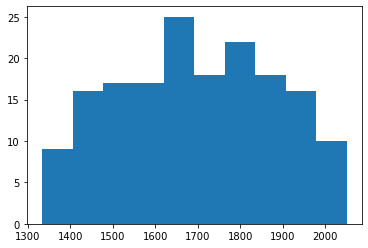

In [11]:
h = plt.hist(x = binary['SAT'])#SAT scores pretty normally distributed 

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [13]:
results_log.summary() #model has 80% accuracy 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.8249
Time:                        16:44:13   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
results_log.predict() #all of the predicted values 

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [23]:
np.array(binary['Admitted']) #actual values 

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [24]:
results_log.pred_table() #confusion matrix for 69 observations model predicted 0 when the true value was 0. For 90 observations model predicted 1

array([[69.,  5.],
       [ 4., 90.]])

In [25]:
model_correct = 69+90

In [28]:
model_incorrect = 4+5

In [32]:
model_correct/(model_correct + model_incorrect) #model has 94 % accuracy 

0.9464285714285714

In [55]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ["Predicted 1", "Predicted 2"]
cm_df = cm_df.rename(index = {0: 'actual 0', 1: 'predicted 1'})
cm_df


,Predicted 1,Predicted 2
actual 0,69.0,5.0
predicted 1,4.0,90.0


In [57]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()